In [10]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [11]:
uber = pd.read_csv('/Users/erikborn/Documents/Python/jupyter/uber.csv')
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [12]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104007 entries, 0 to 104006
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  104007 non-null  object 
 1   Lat        104007 non-null  float64
 2   Lon        104006 non-null  float64
 3   Base       104006 non-null  object 
dtypes: float64(2), object(2)
memory usage: 3.2+ MB


In [13]:
def num_missing(x):
    return sum(x.isnull())
print('Num missing values per column')
print(uber.apply(num_missing,axis=0))

Num missing values per column
Date/Time    0
Lat          0
Lon          1
Base         1
dtype: int64


In [14]:
uber = uber.fillna(0)
uber.isna().sum()
uber.tail()

,Date/Time,Lat,Lon,Base
104002,4/14/2014 11:19:00,40.7219,-74.0042,B02598
104003,4/14/2014 11:19:00,40.7881,-73.9541,B02598
104004,4/14/2014 11:20:00,40.7706,-73.8656,B02598
104005,4/14/2014 11:20:00,40.7513,-73.9741,B02598
104006,4/14/2014 11:21:00,40.0000,0.0000,0


In [49]:
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'],format = "%m/%d/%Y %H:%M:%S")
uber['DayofWeekNum'] = uber['Date/Time'].dt.dayofweek
uber['DayofWeekName'] = uber['Date/Time'].dt.day_name()
uber['DayHour'] = uber['Date/Time'].dt.hour
uber['DayNum'] = uber['Date/Time'].dt.dayofyear
uber.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayNum,DayHour,DayofWeekName
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,91,0,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,91,0,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,91,0,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,91,0,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,91,0,Tuesday


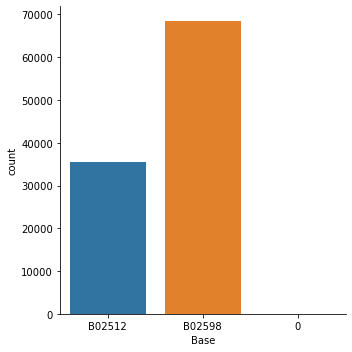

In [26]:
sns.catplot(x = 'Base', data = uber, kind = 'count')

In [33]:
uber_week_data = uber.pivot_table(index = ['DayofWeekNum','DayofWeekName'], values = 'Base',aggfunc='count')
uber_week_data

,,Base
DayofWeekNum,DayNum,
0,Monday,10588
1,Tuesday,14390
2,Wednesday,16282
3,Thursday,17053
4,Friday,18916
5,Saturday,16081
6,Sunday,10697


<AxesSubplot:xlabel='DayofWeekNum,DayNum'>

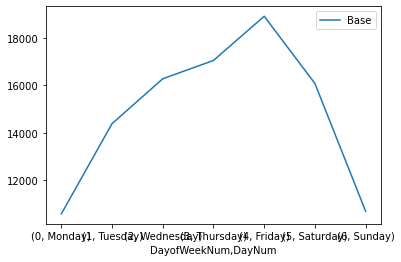

In [41]:
uber_week_data.plot(kind = 'line')

<AxesSubplot:title={'center':'This title'}, xlabel='DayHour'>

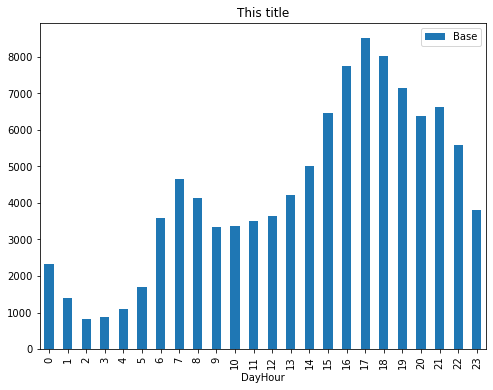

In [47]:
uber_week_data = uber.pivot_table(index = ['DayHour'], values = 'Base',aggfunc='count')
uber_week_data.plot(kind = 'bar',title = 'This title', figsize = (8,6))

<AxesSubplot:xlabel='DayNum'>

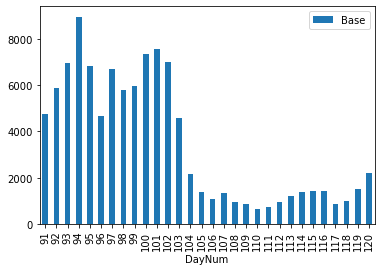

In [52]:
uber_week_data = uber.pivot_table(index = ['DayNum'], values = 'Base',aggfunc='count')
uber_week_data.plot(kind = 'bar')

In [54]:
def countRows(rows):
    return len(rows)

by_date = uber.groupby('DayNum').apply(countRows)
by_date_sorted = by_date.sort_values()
by_date_sorted

DayNum
110     615
111     744
117     848
109     851
108     953
112     959
118     971
106    1059
113    1196
107    1343
105    1391
114    1394
115    1410
116    1418
119    1487
104    2161
120    2186
103    4586
96     4648
91     4749
98     5804
92     5862
99     5979
97     6712
95     6817
93     6981
102    6995
100    7335
101    7575
94     8978
dtype: int64

In [55]:
by_hour_weekday = uber.groupby('DayHour DayofWeekNum'.split()).apply(countRows).unstack()
by_hour_weekday

DayofWeekNum,0,1,2,3,4,5,6
DayHour,,,,,,,
0,92,116,127,144,220,564,1070
1,39,46,71,77,145,375,639
2,46,45,56,54,90,225,311
3,105,83,85,109,142,158,207
4,178,132,166,152,177,130,152
5,324,301,290,285,244,139,120
6,623,632,720,634,651,177,143
7,816,866,942,815,833,215,177
8,627,765,795,716,715,257,263


<AxesSubplot:xlabel='DayofWeekNum', ylabel='DayHour'>

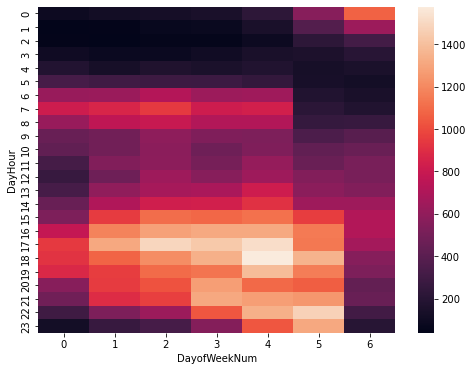

In [56]:
plt.figure(figsize = (8,6))
sns.heatmap(by_hour_weekday)